## Alchemix Question 23: Relationship between ALCX and FEI users?

Authors: dtradke, monetcapital, ryanl

Date: 4/26/21

This notebook addresses question \#23 on the site https://www.notion.so/Analytics-Bounties-for-Alchemix-ffd6c25bdef3486c9b8dfa9476ac6a39. The question is aimed at understanding ALCX users who participated in FEI's Token Genesis Event, specifically their combined value in FEI, and their staking/farming patterns with ALCX and FEI/TRIBE.

We found this question interesting because FEI was one of the most highly anticipated stable-coin launches of all-time, and the project is backed by notable venture capital firms including a16z. The potential connection between Alchemix and FEI lies in the idea of stable-coin farming, as Alchemix is known for its alUSD/3CRV farming pools as well as its unique DAI strategy. To conduct our analysis, we first acquired data from Flipside Velocity’s data querying tool, and then we exported this information to conduct further analysis in Python. We answer 3 different main questions on the relationship between ACLX users and their participation with the FEI stable-coin. 

First, we need to import the Python libraries used for our data analysis.

In [1]:
# import libraries
import re, datetime, time, csv
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request as rq
import numpy as np
import json
import os

Now we import the backend code used to load, format, and process the data in our analysis from a file called "util.py".

In [2]:
# import backend code for processing
import util

We will now import the Flipside Crypto data which corresponds with current ALCX users and their value of FEI/Tribe in USD.

In [3]:
# load/format value of current users with FEI and Tribe value in USD
url = 'https://api.flipsidecrypto.com/api/v2/queries/9b0a847f-a4dd-4d21-a3d3-f57d64b07090/data/latest' 
fei_tribe = util.loadData(url)
fei_tribe_val = util.formatFEITribeVal(fei_tribe)

Next, we import more Flipside Crypto data which corresponds with all of the attendees of the FEI Genesis Event.

In [4]:
# get Genesis event attendees
url = 'https://api.flipsidecrypto.com/api/v2/queries/7c26c1cd-f59f-40b0-892d-f0d229052df3/data/latest'
genesis_event_users = util.loadData(url)

The last data import we do from the Flipside Crypto dataset is a list of the current ALCX holders and their portfolio composition which we will use for our analysis. We also format the the data to compose a dictionary to help track addresses.

In [5]:
# get alcx holders
url = 'https://api.flipsidecrypto.com/api/v2/queries/ddf70c0d-d6e2-41a1-a014-6f33e84fab72/data/latest'
alcx_holders = util.loadData(url)
alcx_holders = util.formatHolders(alcx_holders)

Finally, we calculate the amount of ALCX in each portfolio, and the amount of ALCX and FEI/Tribe that is staked to support our analysis of how these users at the Genesis Event use and stake their currencies.

In [6]:
# get alcx holders who attended event
alcx_genesis_event = util.alcxHoldersAtEvent(genesis_event_users, alcx_holders, fei_tribe_val)

### Question 1: How many users attended the FEI Genesis Event?

The first question we address is about the volume of people who attended the Genesis Event. In doing so, we record the shape of our 'alcx_genesis_event' Pandas dataframe, where one row represents a user at the event. We find that there were a total of 112 users who received FEI/Tribe by attending the Genesis Event.

In [7]:
print("Number of Alchemix users who participated in FEI's Token Genesis Event:  ", alcx_genesis_event.shape[0])

Number of Alchemix users who participated in FEI's Token Genesis Event:   112


### Question 2: What is the total combined value of their position in ALCX?

To answer this question, we sum the row of our dataframe which pertains to each user's value in ALCX. We found that their total combined value in ALCX is almost \\$470,000 USD, shown below. We also show the distirbution of the ALCX value among the entire population in the bar graph below, where a single user has over \\$160,000 USD in ALCX, although the population mean of \\$4,195.40 USD is extremely skewed because of the remaining portion of users having low amounts of ALCX.

In [12]:
print("Total combined value of their position in ALCX: ", np.sum(np.array(alcx_genesis_event['ALCX'])))

Total combined value of their position in ALCX:  469879.711178427


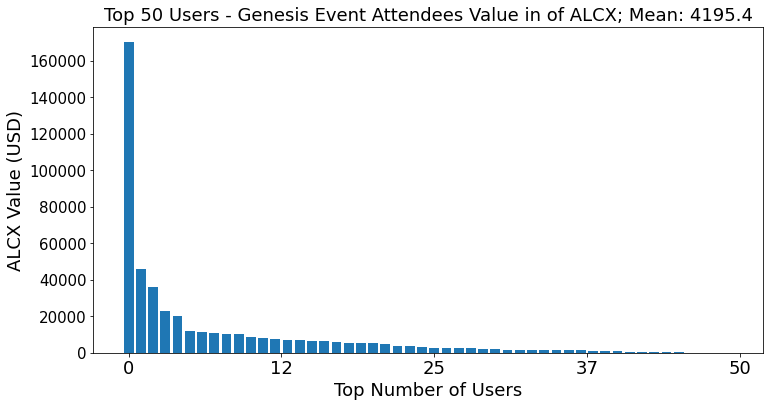

In [13]:
# Amount of ALCX for users who participated in FEI's Token Genesis Event
util.barGraphDist(alcx_genesis_event, 'ALCX','ALCX Value (USD)', 'Genesis Event Attendees Value in of ALCX')

### Question 3: Are these users staking ALCX and FEI/TRIBE the same? Different?

To answer this question, we compare how the 112 users who attended the FEI Genesis Event use their portfolio with staking ALCX and FEI/TRIBE in the farming pools. Below, we show the mean value staked by these users in ALCX, valued in USD along the y-axis. The x-axis shows the top 50 users according to staked ALCX, and each bar pertains to one user. We find that the amount skated of ALCX is still skewed by the large amount of holders not staking, or staking little, and that the asymptotic decline follows a type of exponential decline.

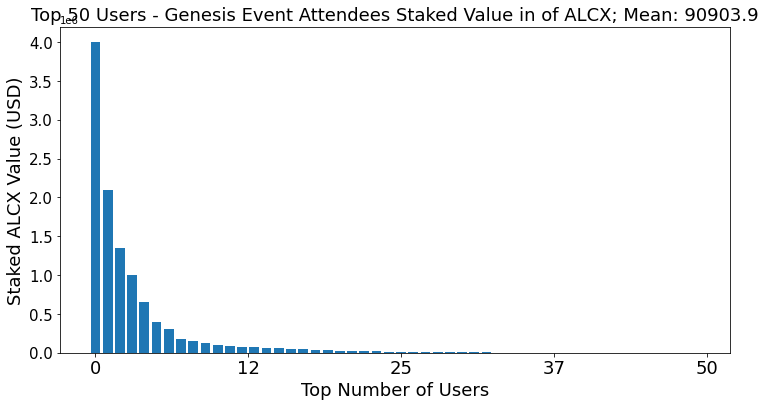

In [14]:
# Amount of ALCX staked for users who participated in FEI's Token Genesis Event
util.barGraphDist(alcx_genesis_event, 'STAKED_ALCX','Staked ALCX Value (USD)', 'Genesis Event Attendees Staked Value in of ALCX')

Next, we plot the top 50 users who staked FEI/TRIBE and calculate the mean value in USD. While the previous plot showed an exponential decline in users who have skated ALCX, the plot showing the amount of FEI/TRIBE staked suggests this pattern does not follow an exponential decline and is instead heavily weighted towards just the top 5 stakers of FEI/TRIBE. This pattern suggests only a handful of users are staking FEI/TRIBE, and that this distribution is incredibly unbalanced. A result of this is the mean value of FEI/TRIBE being staked being skewed to the higher side of over \\$276,000.

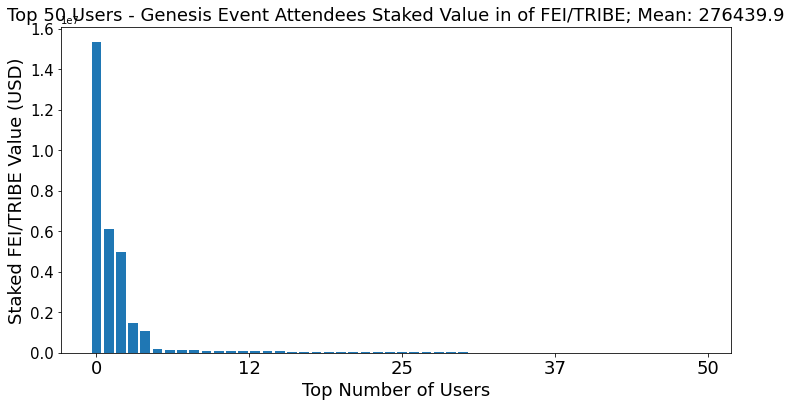

In [17]:
# Amount of FEI/TRIBE staked for users who participated in FEI's Token Genesis Event
util.barGraphDist(alcx_genesis_event, 'STAKED_FEITRIBE','Staked FEI/TRIBE Value (USD)', 'Genesis Event Attendees Staked Value in of FEI/TRIBE')

## Conclusion

In summation, we found that 112 ALCX token holders participated in the FEI genesis event, which seems small in aggregate, but is quite significant considering the fact that it was simply a stable-coin project. We also found that out of the 112 that participated in the event, the average user held quite a bit of ALCX (near \\$4,195 USD), although the top users, or so called whales, carried a large portion of the total combined position in ALCX (\\$469,879 USD). We also determined a similar distribution curve between ALCX staked and FEI/TRIBE staked, however we did notice that less users were as active in the FEI/TRIBE pool. We believe that this may have been caused by decreased user interest, or the commotion relating to FEI not being able to hold its peg as well as the depreciating value of TRIBE, or the simple fact that many ALCX users simply wanted to claim the genesis bonus (users received a pro-rata bonus amount of TRIBE, the governance token, dependant on how much ETH users committed to FEI).